<a href="https://colab.research.google.com/github/student64-ahmadi/Impulsive-Hamiltonian-Dynamics/blob/main/notebook3a1242f96f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

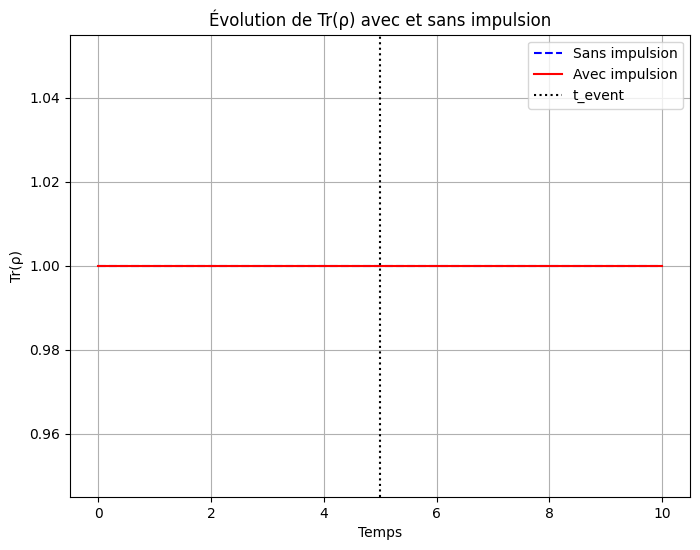

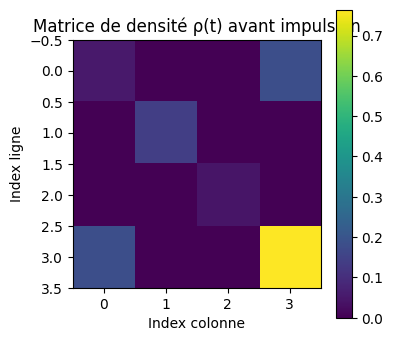

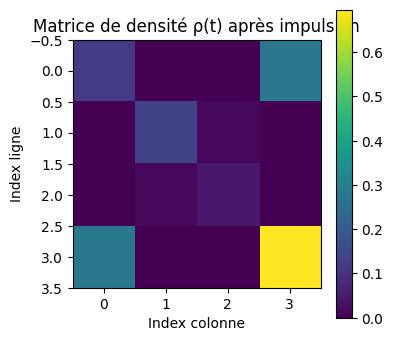

In [14]:
# Installer les packages nécessaires (à exécuter une seule fois)
!pip install qutip matplotlib numpy

# Importer les modules requis
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Paramètres du système
gamma = 0.1        # Taux de dissipation
mu = 1.0           # Intensité de l'impulsion
t_event = 5.0      # Temps auquel l'impulsion est appliquée
sigma = 0.01       # Largeur de la gaussienne qui approxime δ(t)
tlist = np.linspace(0, 10, 200)  # Plage de temps de la simulation

# Définition des opérateurs de Pauli et de l'identité
sx = sigmax()
sm = sigmam()       # Opérateur d'abaissement
I2 = qeye(2)
sz = sigmaz()

# Hamiltonien sans impulsion pour un système à deux qubits
H0 = -tensor(sx, sx)

# Définition du terme impulsif en utilisant une expression temporelle
# Nous utilisons l'opérateur H1 = tensor(sigmaz(), I2) associé à une expression string
H1 = tensor(sz, I2)
# L'expression string pour le facteur temporel (doit être compatible avec numpy.exp)
# "mu * exp(-((t - t_event)**2)/(2*sigma**2))"
args = {'mu': mu, 't_event': t_event, 'sigma': sigma}

H_with_impulse = [H0, [H1, "mu * exp(-((t - t_event)**2)/(2*sigma**2))"]]

# Définition de l'opérateur de saut (collapse operator)
L = np.sqrt(gamma) * tensor(sm, I2)
c_ops = [L]

# État initial : |0> ⊗ |0>
psi0 = tensor(basis(2, 0), basis(2, 0))
rho0 = psi0 * psi0.dag()

# Simulation sans impulsion
result_no_impulse = mesolve(H0, rho0, tlist, c_ops, [])

# Simulation avec impulsion
result_with_impulse = mesolve(H_with_impulse, rho0, tlist, c_ops, [], args=args)

# Extraction de la trace de ρ pour chaque simulation
trace_no_impulse = [state.tr() for state in result_no_impulse.states]
trace_with_impulse = [state.tr() for state in result_with_impulse.states]

# Tracé de l'évolution de Tr(ρ)
plt.figure(figsize=(8,6))
plt.plot(tlist, trace_no_impulse, 'b--', label='Sans impulsion')
plt.plot(tlist, trace_with_impulse, 'r-', label='Avec impulsion')
plt.axvline(t_event, color='k', linestyle=':', label='t_event')
plt.xlabel('Temps')
plt.ylabel('Tr(ρ)')
plt.title('Évolution de Tr(ρ) avec et sans impulsion')
plt.legend()
plt.grid(True)
plt.show()

# Visualisation de la matrice densité avant et après l'impulsion
# On sélectionne des instants juste avant et juste après t_event
t_before = t_event - 0.1
t_after = t_event + 0.1
idx_before = np.argmin(np.abs(tlist - t_before))
idx_after = np.argmin(np.abs(tlist - t_after))

rho_before = result_with_impulse.states[idx_before]
rho_after = result_with_impulse.states[idx_after]

# Fonction pour tracer la matrice densité sous forme de heatmap
def plot_density_matrix(rho, title):
    mat = np.abs(rho.full())
    plt.figure(figsize=(4,4))
    plt.imshow(mat, interpolation='nearest', cmap='viridis')
    plt.title(title)
    plt.xlabel('Index colonne')
    plt.ylabel('Index ligne')
    plt.colorbar()
    plt.show()

plot_density_matrix(rho_before, 'Matrice de densité ρ(t) avant impulsion')
plot_density_matrix(rho_after, 'Matrice de densité ρ(t) après impulsion')


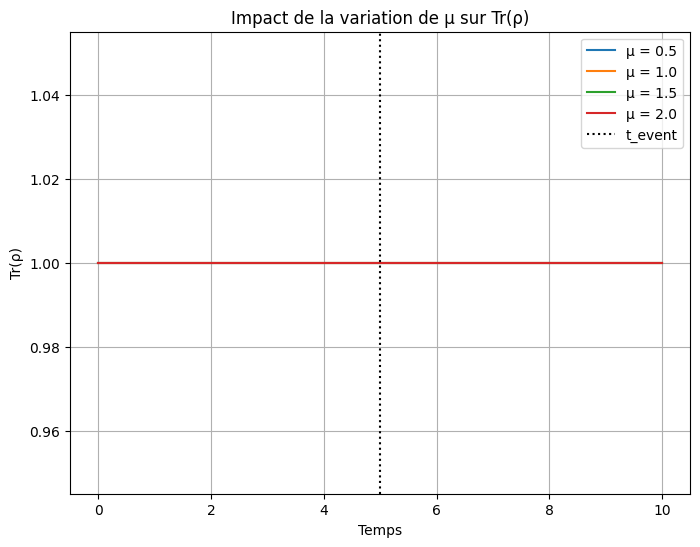

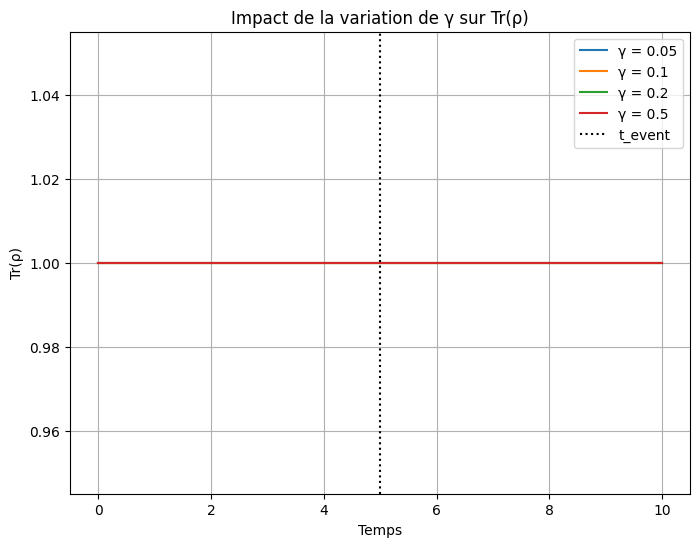

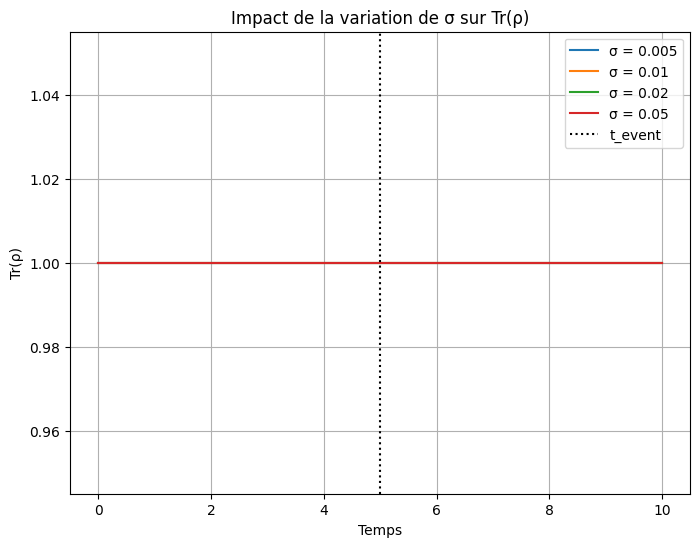

In [11]:
# Installer les packages nécessaires (à exécuter une seule fois)
!pip install qutip matplotlib numpy

# Importer les modules requis
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Fonction de simulation qui retourne l'évolution de Tr(ρ) avec impulsion
def simulate_trace(mu, gamma, sigma, t_event=5.0, tlist=np.linspace(0, 10, 200)):
    # Définition des opérateurs pour un système à deux qubits
    sx = sigmax()
    sm = sigmam()  # opérateur d'abaissement
    sz = sigmaz()
    I2 = qeye(2)

    # Hamiltonien sans impulsion
    H0 = -tensor(sx, sx)

    # Opérateur pour le terme impulsif
    H1 = tensor(sz, I2)

    # Expression temporelle pour l'impulsion (compatible avec qutip)
    # L'expression utilise les variables mu, t_event et sigma
    impulse_expr = "mu * exp(-((t - t_event)**2)/(2*sigma**2))"
    args = {'mu': mu, 't_event': t_event, 'sigma': sigma}
    H_with_impulse = [H0, [H1, impulse_expr]]

    # Opérateur de saut (collapse operator)
    L = np.sqrt(gamma) * tensor(sm, I2)
    c_ops = [L]

    # État initial : |0> ⊗ |0>
    psi0 = tensor(basis(2, 0), basis(2, 0))
    rho0 = psi0 * psi0.dag()

    # Simulation avec impulsion
    result = mesolve(H_with_impulse, rho0, tlist, c_ops, [], args=args)
    # Extraction de la trace de ρ à chaque instant
    trace_values = [state.tr() for state in result.states]
    return tlist, np.array(trace_values)

# Définir une plage de temps pour la simulation
tlist = np.linspace(0, 10, 200)

#############################
# Test 1: Variation de μ
mu_values = [0.5, 1.0, 1.5, 2.0]
plt.figure(figsize=(8,6))
for mu in mu_values:
    t, trace_val = simulate_trace(mu=mu, gamma=0.1, sigma=0.01, t_event=5.0, tlist=tlist)
    plt.plot(t, trace_val, label=f'μ = {mu}')
plt.axvline(5.0, color='k', linestyle=':', label='t_event')
plt.xlabel('Temps')
plt.ylabel('Tr(ρ)')
plt.title("Impact de la variation de μ sur Tr(ρ)")
plt.legend()
plt.grid(True)
plt.show()

#############################
# Test 2: Variation de γ
gamma_values = [0.05, 0.1, 0.2, 0.5]
plt.figure(figsize=(8,6))
for gamma in gamma_values:
    t, trace_val = simulate_trace(mu=1.0, gamma=gamma, sigma=0.01, t_event=5.0, tlist=tlist)
    plt.plot(t, trace_val, label=f'γ = {gamma}')
plt.axvline(5.0, color='k', linestyle=':', label='t_event')
plt.xlabel('Temps')
plt.ylabel('Tr(ρ)')
plt.title("Impact de la variation de γ sur Tr(ρ)")
plt.legend()
plt.grid(True)
plt.show()

#############################
# Test 3: Variation de σ (largeur de la gaussienne)
sigma_values = [0.005, 0.01, 0.02, 0.05]
plt.figure(figsize=(8,6))
for sigma in sigma_values:
    t, trace_val = simulate_trace(mu=1.0, gamma=0.1, sigma=sigma, t_event=5.0, tlist=tlist)
    plt.plot(t, trace_val, label=f'σ = {sigma}')
plt.axvline(5.0, color='k', linestyle=':', label='t_event')
plt.xlabel('Temps')
plt.ylabel('Tr(ρ)')
plt.title("Impact de la variation de σ sur Tr(ρ)")
plt.legend()
plt.grid(True)
plt.show()


10.0%. Run time:   0.08s. Est. time left: 00:00:00:00
20.0%. Run time:   0.13s. Est. time left: 00:00:00:00
30.0%. Run time:   0.19s. Est. time left: 00:00:00:00
40.0%. Run time:   0.26s. Est. time left: 00:00:00:00
50.0%. Run time:   0.32s. Est. time left: 00:00:00:00
60.0%. Run time:   0.41s. Est. time left: 00:00:00:00
70.0%. Run time:   0.44s. Est. time left: 00:00:00:00
80.0%. Run time:   0.51s. Est. time left: 00:00:00:00
90.0%. Run time:   0.55s. Est. time left: 00:00:00:00
100.0%. Run time:   0.61s. Est. time left: 00:00:00:00
Total run time:   0.62s


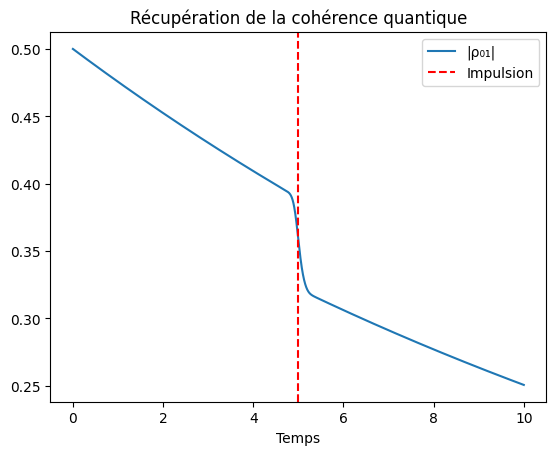

In [13]:
import numpy as np
import qutip as qt

# Paramètres
gamma = 0.1
mu = 1.0
t_event = 5.0
impulse_strength = 2.0

# États et opérateurs
ground = qt.basis(2, 0)
excited = qt.basis(2, 1)
rho_initial = (ground + excited).unit() * (ground + excited).unit().dag()  # Superposition initiale

# Grille de temps haute résolution
times = np.linspace(0, 10, 10000)

# Hamiltonien avec impulsion gaussienne
def H_t(t, args):
    H0 = mu * qt.sigmaz()
    impulse = impulse_strength * np.exp(-(t - t_event)**2 / (2 * 0.1**2)) * qt.sigmax()
    return H0 + impulse

# Collapse operators
collapse_ops = [np.sqrt(gamma) * qt.sigmam()]

# Simulation
result = qt.mesolve(
    H_t,
    rho_initial,
    times,
    collapse_ops,
    options={"progress_bar": True}
)

# Calcul de la cohérence
coherence = [abs(rho[0, 1]) for rho in result.states]

# Affichage
plt.plot(times, coherence, label="|ρ₀₁|")
plt.axvline(t_event, color="red", linestyle="--", label="Impulsion")
plt.title("Récupération de la cohérence quantique")
plt.xlabel("Temps")
plt.legend()
plt.show()